In [1]:
import tensorflow as tf
import os
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
image_dataset= tf.keras.datasets.mnist.load_data(
)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
(X_train, Y_train),(X_test,Y_test) = image_dataset

In [5]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

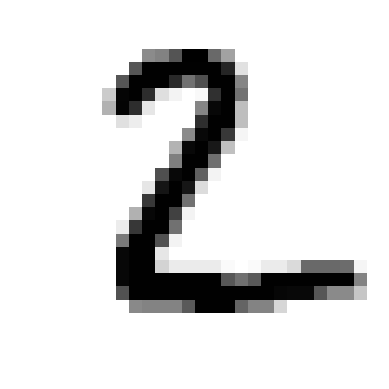

In [41]:
plt.imshow(X_test[1],cmap = 'binary')
plt.axis('off')
plt.show()

<Axes: >

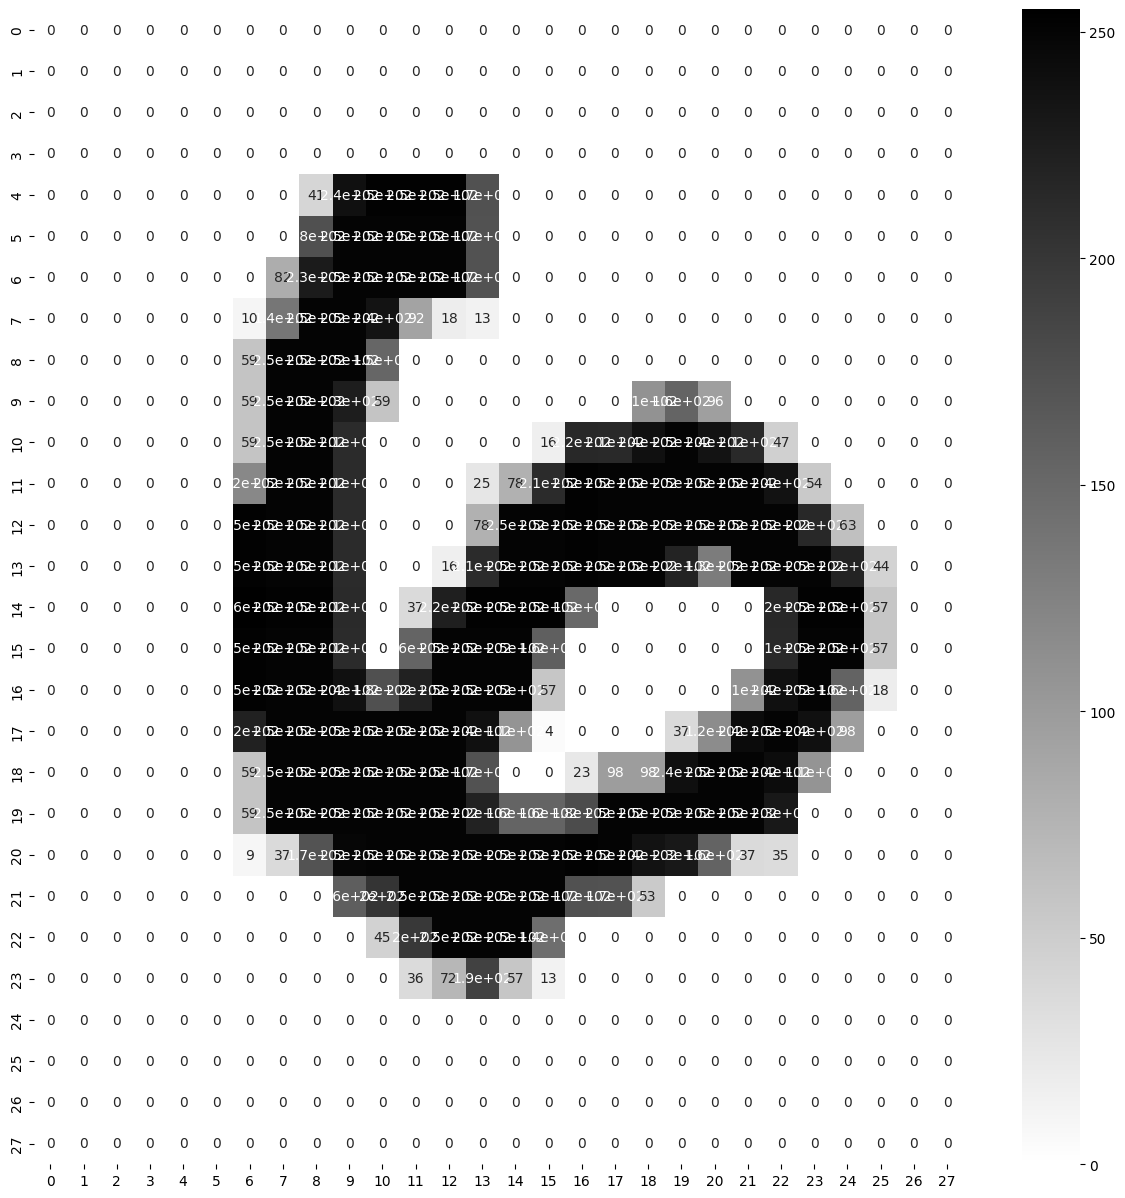

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[9000], annot=True, cmap='binary')


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
x_valid,x_train = X_train[:5000]/255,X_train[5000:]/255

In [11]:
y_valid,y_train = Y_train[:5000],Y_train[5000:]

In [12]:
y_valid

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

In [13]:
type(x_valid)

numpy.ndarray

In [14]:
np.max(x_valid), np.min(x_valid)

(1.0, 0.0)

In [15]:
X_test =X_test/255

In [16]:
from tensorflow.keras import models

In [17]:
x_train.shape

(55000, 28, 28)

In [18]:
from tensorflow.keras.layers import Flatten,Dense

In [19]:
model = models.Sequential()

In [20]:
model.add(Flatten(input_shape = (28,28)))

In [21]:
model.add(Dense(units = 100,activation = 'relu'))

In [22]:
model.add(Dense(units = 10, activation = 'relu'))

In [23]:
model.add(Dense(units =10, activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [58]:
model.layers

In [59]:
model.layers[0].get_weights()

[]

In [60]:
x_valid,x_train = X_train[:5000]/255,X_train[5000:]/255
y_valid,y_train = Y_train[:5000],Y_train[5000:]

In [61]:
y_train.shape

(55000,)

In [66]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,y_train, epochs = 10,validation_data =(x_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.1361 - val_accuracy: 0.9746
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.1452 - val_accuracy: 0.9742
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.1455 - val_accuracy: 0.9758
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.1611 - val_accuracy: 0.9742
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0084 - accuracy: 0.9968 - val_loss: 0.1579 - val_accuracy: 0.9726
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.1594 - val_accuracy: 0.9726
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.1468 - val_accuracy:

In [67]:
history.history

{'loss': [0.009546706452965736,
  0.008616325445473194,
  0.009870714507997036,
  0.0065866499207913876,
  0.00839909166097641,
  0.009175031445920467,
  0.006126218009740114,
  0.006956758443266153,
  0.0074983383528888226,
  0.009054096415638924],
 'accuracy': [0.9966909289360046,
  0.9970181584358215,
  0.9967454671859741,
  0.9977818131446838,
  0.9968363642692566,
  0.9970181584358215,
  0.99798184633255,
  0.9977636337280273,
  0.9976000189781189,
  0.9971454739570618],
 'val_loss': [0.13612514734268188,
  0.14521831274032593,
  0.14548547565937042,
  0.16107365489006042,
  0.1579321175813675,
  0.15936824679374695,
  0.14679235219955444,
  0.14672619104385376,
  0.1634192317724228,
  0.18115171790122986],
 'val_accuracy': [0.9746000170707703,
  0.9742000102996826,
  0.9757999777793884,
  0.9742000102996826,
  0.972599983215332,
  0.972599983215332,
  0.9764000177383423,
  0.9765999913215637,
  0.9778000116348267,
  0.9715999960899353]}

In [69]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.009547,0.996691,0.136125,0.9746
1,0.008616,0.997018,0.145218,0.9742
2,0.009871,0.996745,0.145485,0.9758
3,0.006587,0.997782,0.161074,0.9742
4,0.008399,0.996836,0.157932,0.9726
5,0.009175,0.997018,0.159368,0.9726
6,0.006126,0.997982,0.146792,0.9764
7,0.006957,0.997764,0.146726,0.9766
8,0.007498,0.997600,0.163419,0.9778
9,0.009054,0.997145,0.181152,0.9716


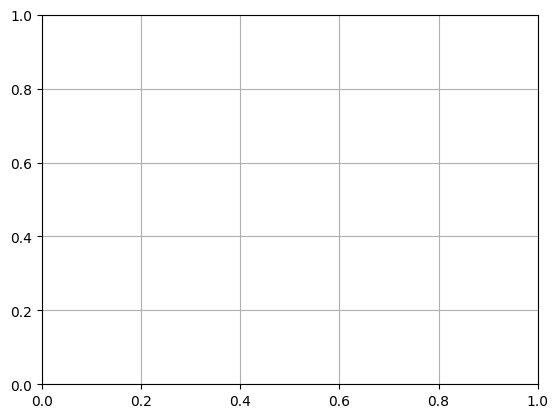

In [80]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [63]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [32]:
y_pred

array([[1.2181476e-13, 2.0906699e-10, 9.9628394e-08, ..., 9.9999988e-01,
        4.0254464e-10, 2.9866037e-08],
       [3.4426284e-10, 3.4850000e-08, 9.9999988e-01, ..., 8.4683918e-12,
        5.4768112e-08, 1.5386905e-21],
       [4.1596071e-08, 9.9987042e-01, 1.4343591e-07, ..., 1.4889466e-05,
        8.6335211e-05, 1.9646737e-10],
       ...,
       [7.1030466e-11, 8.7696397e-14, 9.2332344e-14, ..., 2.9121641e-09,
        5.2982831e-12, 2.9223090e-08],
       [1.3189721e-13, 7.5435819e-14, 7.9082714e-15, ..., 2.8552640e-14,
        7.5996782e-09, 6.7650960e-17],
       [1.9783217e-08, 8.8940276e-13, 1.7042581e-09, ..., 3.8286275e-15,
        5.6687892e-08, 7.9351067e-11]], dtype=float32)

In [36]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1060 - accuracy: 0.9740


[0.10603715479373932, 0.9739999771118164]

In [37]:
prediction = model.predict(X_test[1].reshape(1, 28, 28))


1/1 [==============================] - 0s 31ms/step


In [38]:
np.argmax(prediction)

2

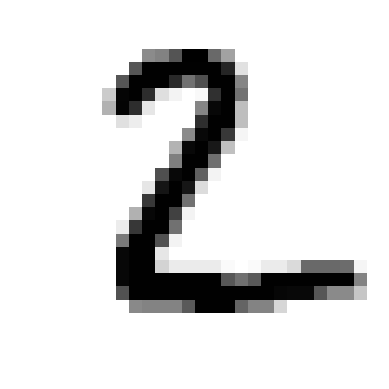

In [42]:
plt.imshow(X_test[1],cmap = 'binary')
plt.axis('off')
plt.show()

In [81]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}